In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

In [2]:
# set display options
pd.set_option('display.max_colwidth', 200)
sns.set_style(style='whitegrid')

In [3]:
#loading the dataset
df = pd.read_csv('../data_ingestion/data/raw_airxiv.csv')
df.head()

,id,title,summary,published,authors
0,http://arxiv.org/abs/2505.13448v1,CIE: Controlling Language Model Text Generations Using Continuous\n Signals,Aligning language models with user intent is becoming increasingly relevant\nto enhance user experience. This calls for designing methods that can allow\nusers to control the properties of the lan...,2025-05-19T17:59:58Z,"Vinay Samuel, Harshita Diddee, Yiming Zhang, Daphne Ippolito"
1,http://arxiv.org/abs/2505.13445v1,"Trust, But Verify: A Self-Verification Approach to Reinforcement\n Learning with Verifiable Rewards","Large Language Models (LLMs) show great promise in complex reasoning, with\nReinforcement Learning with Verifiable Rewards (RLVR) being a key enhancement\nstrategy. However, a prevalent issue is `...",2025-05-19T17:59:31Z,"Xiaoyuan Liu, Tian Liang, Zhiwei He, Jiahao Xu, Wenxuan Wang, Pinjia He, Zhaopeng Tu, Haitao Mi, Dong Yu"
2,http://arxiv.org/abs/2505.13444v1,ChartMuseum: Testing Visual Reasoning Capabilities of Large\n Vision-Language Models,"Chart understanding presents a unique challenge for large vision-language\nmodels (LVLMs), as it requires the integration of sophisticated textual and\nvisual reasoning capabilities. However, curr...",2025-05-19T17:59:27Z,"Liyan Tang, Grace Kim, Xinyu Zhao, Thom Lake, Wenxuan Ding, Fangcong Yin, Prasann Singhal, Manya Wadhwa, Zeyu Leo Liu, Zayne Sprague, Ramya Namuduri, Bodun Hu, Juan Diego Rodriguez, Puyuan Peng, G..."
3,http://arxiv.org/abs/2505.13438v1,Optimizing Anytime Reasoning via Budget Relative Policy Optimization,Scaling test-time compute is crucial for enhancing the reasoning capabilities\nof large language models (LLMs). Existing approaches typically employ\nreinforcement learning (RL) to maximize a veri...,2025-05-19T17:58:44Z,"Penghui Qi, Zichen Liu, Tianyu Pang, Chao Du, Wee Sun Lee, Min Lin"
4,http://arxiv.org/abs/2505.13434v1,SMOTExT: SMOTE meets Large Language Models,"Data scarcity and class imbalance are persistent challenges in training\nrobust NLP models, especially in specialized domains or low-resource settings.\nWe propose a novel technique, SMOTExT, that...",2025-05-19T17:57:36Z,"Mateusz Bystroński, Mikołaj Hołysz, Grzegorz Piotrowski, Nitesh V. Chawla, Tomasz Kajdanowicz"


In [4]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   object
 1   title      1000 non-null   object
 2   summary    1000 non-null   object
 3   published  1000 non-null   object
 4   authors    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [5]:
#null and duplicate check
print("Missing Values:\n", df.isnull().sum())
print("Duplicates based on title: ", df.duplicated(subset="title").sum())
print("Duplicates based on abstract: ", df.duplicated(subset="summary").sum())

Missing Values:
 id           0
title        0
summary      0
published    0
authors      0
dtype: int64
Duplicates based on title:  0
Duplicates based on abstract:  0


In [6]:
# Length distribution of abstract and title
df['abstract_len'] = df['summary'].apply(len)
df['title_len'] = df['title'].apply(len)

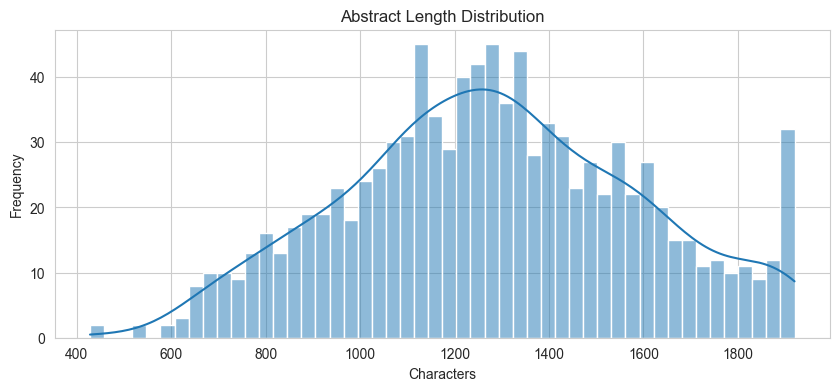

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(df['abstract_len'], bins=50, kde=True)
plt.title("Abstract Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

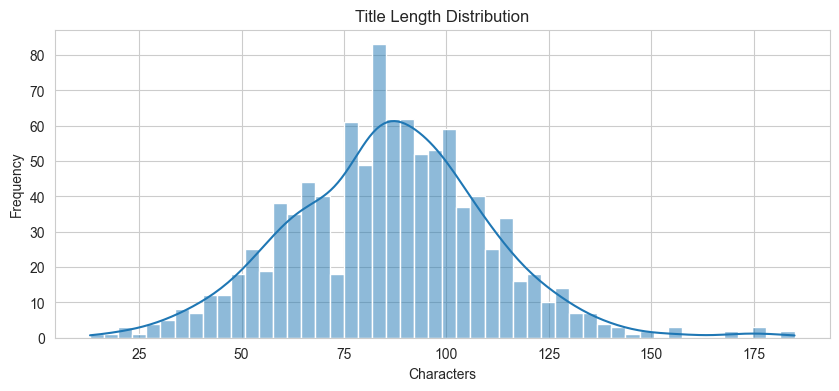

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(df['title_len'], bins=50, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

In [9]:
#most common words in text after cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\$.*?\$', '', text)  # Remove LaTeX math
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove punctuation
    return text

all_words = " ".join(clean_text(txt) for txt in df.summary)
words_list = all_words.split()
common_words = Counter(words_list).most_common(20)

# Show most common words
pd.DataFrame(common_words, columns=["Word", "Count"])

,Word,Count
0,the,5145
1,and,4780
2,to,3732
3,of,3497
4,a,2883
5,in,2598
6,we,2072
7,that,1645
8,for,1612
9,models,1490


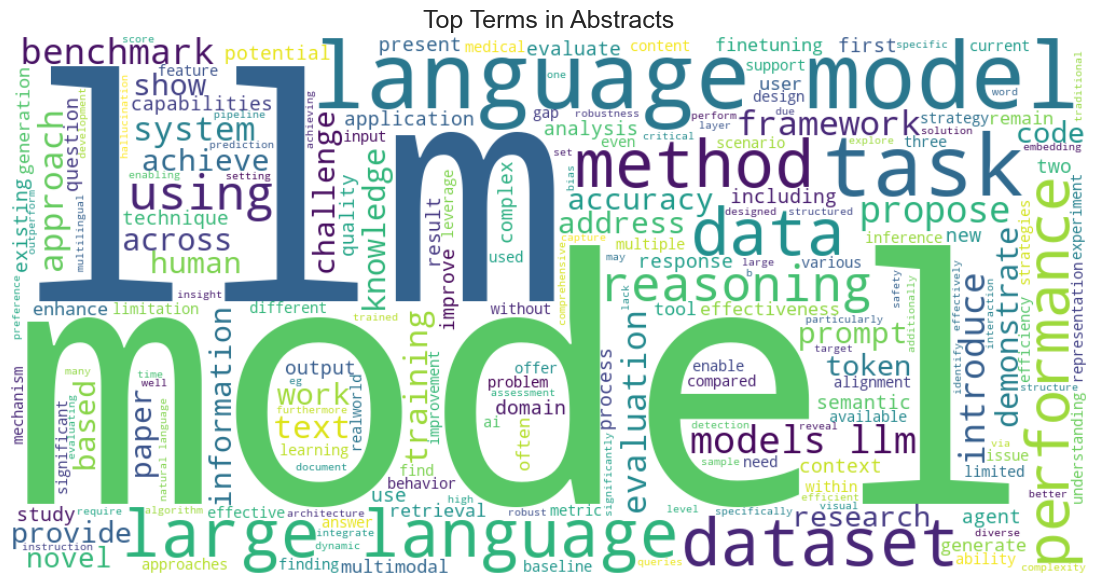

In [10]:
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Terms in Abstracts", fontsize=18)
plt.show()